# Project 3 - Covid-19 Effects on Different Age Groups in Israel

##### מטרת הפרויקט: הצגה ויזואלית של השפעות נגיף הקורונה על קבוצות גיל שונות בישראל בתאריכים 21.03.2020-30.10.2021 לשם ייעול הנגשת המידע לציבור ועידוד לשמירה על הנחייות משרד הבריאות והתחסנות

הנתונים נלקחו ממאגרי המידע הממשלתיים, באתר אותו אפשר לראות בקישור הבא:

https://data.gov.il/dataset/covid-19


מאפייני הדאטא:

תאריך תחילת שבוע ותאריך סוף שבוע- מסמנים את השבוע הספציפי עליו נאסף המידע

קבוצת גיל

מגדר

סך הבדיקות שנערכו באותו שבוע

סך החולים שנמצאו חיוביים בבדיקות באותו שבוע

סך הנפטרים מהמחלה לאותו שבוע

#### השאלות עליהן ארצה לענות:
א-מי נמצא בסיכון גבוה יותר? גברים או  נשים?
ב-עד כמה משפיע גיל החולה על רמת הסיכון למות?
ג-מתי הגיעה התחלואה והתמותה בישראל בגלל הנגיף לשיאה?
ד-כמה מכלל הבדיקות יצאו חיוביות?

## שלב א' - ייבוא הנתונים

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sb

In [2]:
cases=pd.read_csv(r"C:\Users\nimro\Desktop\MAYA\corona_age_and_gender.csv",sep ="," )

In [3]:
cases

,first_week_day,last_week_day,age_group,gender,weekly_tests_num,weekly_cases,weekly_deceased
0,15/03/2020,21/03/2020,0-19,Men,1115,44,0
1,15/03/2020,21/03/2020,0-19,Not Binary,0,0,0
2,15/03/2020,21/03/2020,0-19,Women,1065,39,0
3,15/03/2020,21/03/2020,20-24,Men,613,92,0
4,15/03/2020,21/03/2020,20-24,Not Binary,0,0,0
...,...,...,...,...,...,...,...
3754,24/10/2021,30/10/2021,80+,Not Binary,203,0,0
3755,24/10/2021,30/10/2021,80+,Women,8763,22,0
3756,24/10/2021,30/10/2021,NaN,Men,2186,23,0
3757,24/10/2021,30/10/2021,NaN,Not Binary,1147,0,0


##### טבלת הנתונים מציגה מידע על כל שבוע בין התאריכים 21.03.2020-30.10.2021, כלומר משך זמן של שנה ושבעה חודשים

In [4]:
cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3759 entries, 0 to 3758
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   first_week_day    3759 non-null   object
 1   last_week_day     3759 non-null   object
 2   age_group         3504 non-null   object
 3   gender            3759 non-null   object
 4   weekly_tests_num  3759 non-null   int64 
 5   weekly_cases      3759 non-null   int64 
 6   weekly_deceased   3759 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 205.7+ KB


 #####  צריך להפוך את התאריכים לסוג משתנה של תאריך





In [5]:
cases["first_week_day"] = pd.to_datetime(cases["first_week_day"],dayfirst = True)
cases["last_week_day"] = pd.to_datetime(cases["last_week_day"],dayfirst = True)

נוודא שההחלפה בוצעה בהצלחה

In [6]:
cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3759 entries, 0 to 3758
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   first_week_day    3759 non-null   datetime64[ns]
 1   last_week_day     3759 non-null   datetime64[ns]
 2   age_group         3504 non-null   object        
 3   gender            3759 non-null   object        
 4   weekly_tests_num  3759 non-null   int64         
 5   weekly_cases      3759 non-null   int64         
 6   weekly_deceased   3759 non-null   int64         
dtypes: datetime64[ns](2), int64(3), object(2)
memory usage: 205.7+ KB


##### string צריך להחליף את הערכים הריקים בטקסט 

In [7]:
cases['age_group'] = cases['age_group'].fillna('unknown')

נוודא שההחלפה בוצעה בהצלחה

In [8]:
print(cases['age_group'].unique())

['0-19' '20-24' '25-29' '30-34' '35-39' '40-44' '45-49' '50-54' '55-59'
 '60-64' '65-69' '70-74' '75-79' '80+' 'unknown']


##### נמצא סכום נפטרים בטבלת הנתונים


In [9]:
cases['weekly_deceased'].sum()

np.int64(4656)

##### נבדוק כמה נפטרו בקבוצת הגיל הצעירה ביותר 0-19 שנים

In [10]:
mask = cases['weekly_deceased'] > 0
mask2 = cases['age_group'].to_string() == '0-19'
cases[mask&mask2]

,first_week_day,last_week_day,age_group,gender,weekly_tests_num,weekly_cases,weekly_deceased


 לא היו נפטרים מתחת לגיל 19

##### נבדוק ממוצע הדבקות בשבוע וממוצע נפטרים בשבוע


In [11]:
weekly_cases_mean = cases['weekly_cases'].mean()
weekly_deceased_mean = cases['weekly_deceased'].mean()
print(f"Weekly cases mean is: {weekly_cases_mean}\nWeekly deceased mean is: {weekly_deceased_mean}")

Weekly cases mean is: 352.61026868848097
Weekly deceased mean is: 1.2386272944932162


 ממוצע ההדבקות בשבוע עמד על כ-352 חולים חדשים וממוצע הפטירות בשבוע עמד על כ-1.2 נפטרים


##### נציג בעזרת פונקציית תיאור את האגרגציות המסכמות של הנתונים

In [12]:
cases[['weekly_tests_num', 'weekly_cases', 'weekly_deceased']].describe()

,weekly_tests_num,weekly_cases,weekly_deceased
count,3759.000000,3759.000000,3759.000000
mean,7755.526736,352.610269,1.238627
std,17945.194644,1126.440165,7.509635
min,0.000000,0.000000,0.000000
25%,213.000000,0.000000,0.000000
50%,2931.000000,36.000000,0.000000
75%,8414.000000,263.500000,0.000000
max,247689.000000,17049.000000,112.000000


## שלב ב' - ויזואליזציות

##### ראשית נבדוק אם יש הבדל משמעותי בין תמותה בקרב גברים לבין תמותה בקרב נשים
בשביל לדעת אם מין אחד נמצא בסיכון גבוה יותר מהשני

In [13]:
gender_data = cases.groupby('gender')['weekly_deceased'].mean()

gender_total_cases = cases.groupby('gender')['weekly_deceased'].sum()

gender_total_cases

gender
Men           2605
Not Binary       0
Women         2051
Name: weekly_deceased, dtype: int64

קיים הבדל של 554 מקרי מוות עבור גברים מה שמעלה את החשד כי הם בסכנה גדולה יותר למות מהמחלה.

##### נבדוק את ההבדל באחוזים:

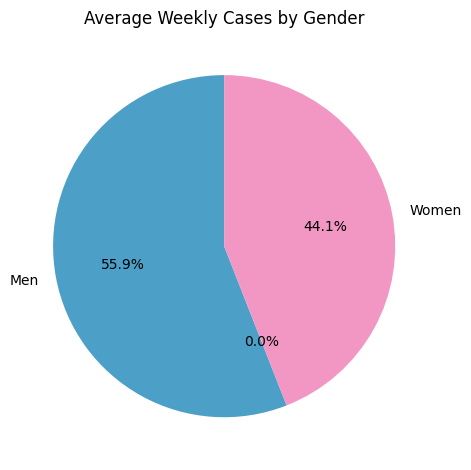

In [14]:
gender_data = cases.groupby('gender')['weekly_deceased'].mean()

palette1 = ['#4ca0c7', '#949494', '#f296c3']

#פורמט אחוזים ובחירת זווית ישרה לגרף
gender_data.plot(kind="pie", autopct='%1.1f%%', startangle=90, colors=palette1)

#כותרת
plt.title('Average Weekly Cases by Gender')

plt.ylabel('')  #כי אין צורך בתג נוסף

plt.tight_layout()
plt.show()

הגרף מעיד כי יש הבדל של כמעט 12% בתמותה בין המינים. לכן למרות שלא מדובר בהבדל משמעותי, עדיין ייתכן שהמחלה מהווה סכנה ממשית יותר עבור גברים.
מניתוח של מידע כלל עולמי על המחלה, ההבדל היה ניכר יותר ואכן הוסק כי גברים נמצאים בסיכון גבוה יותר למות מנגיף הקורונה

https://www.nytimes.com/2020/02/20/health/coronavirus-men-women.html

##### אילו קבוצות גיל נמצאות בסיכון?
 נבדוק זאת בעזרת גרף עוגה של היחס בין קבוצות גיל שונות בשיעורי התמותה

Text(0, 0.5, '')

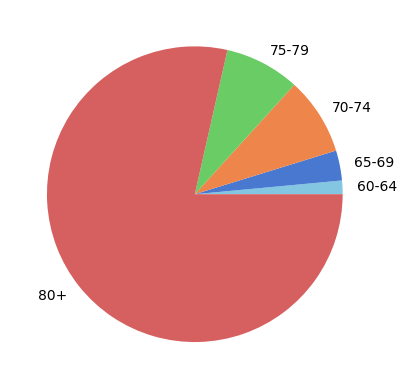

In [15]:
palette2 = sb.color_palette("muted")
cases.groupby('age_group')['weekly_deceased'].sum().plot(kind = "pie", colors=palette2)
plt.ylabel('') 

##### בגרף הנ"ל אנחנו יכולים לראות עד כמה משמעותי גיל החולה ברמת הסיכון שהמחלה גורמת לו. חולים מתחת לגיל 60 בעלי סיכויי נמוך מאוד למות מהמחלה, בבסיס הנתונים הנוכחי אין תיעוד של אף נפטר מתחת לגיל 60

#### כעת נציג כמה חולים חדשים מתווספים בממוצע בשבוע עבור כל קבוצת גיל


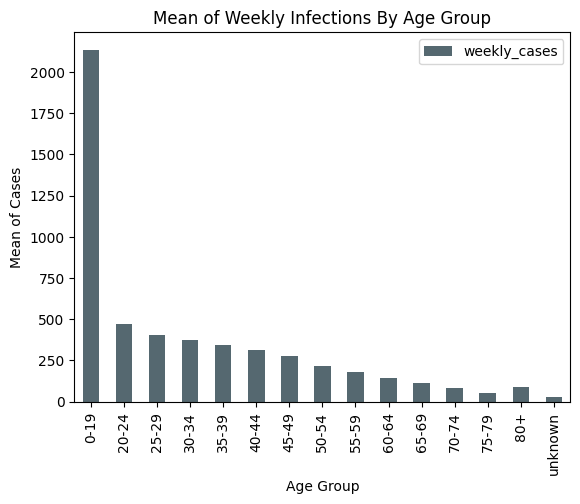

In [16]:

cases.groupby('age_group')[['weekly_cases']].mean().plot(kind = 'bar', color="#556870")


plt.title('Mean of Weekly Infections By Age Group')
plt.ylabel('Mean of Cases')
plt.xlabel('Age Group')
plt.show()


ניתן לראות שבקבוצות הגיל הצעירות יותר, ממוצע שיעורי ההדבקה גבוה יותר מאשר אצל בני הגיל השלישי שנחשבים בסיכון. ניתן ליייחס זאת להקפדה מוגברת בקרב מבוגרים על הנחיות משרד הבריאות או לחלופין לחוסר הקפדה בקרב ילדים ובני נוער. מאחר שסיכויים למות מהמחלה שואף ל-0, ניתן לומר שההדבקה מסוכנת רק בגלל הפצת המגפה הלאה ולא לחולים בגילאים אלו עצמם

גם במקרים הקשים נראית עליה החופפת לגלי המחלה

#### כעת נבדוק את שיעור התחלואה בקבוצות גיל שונות לאורך החודשים הנבחנים

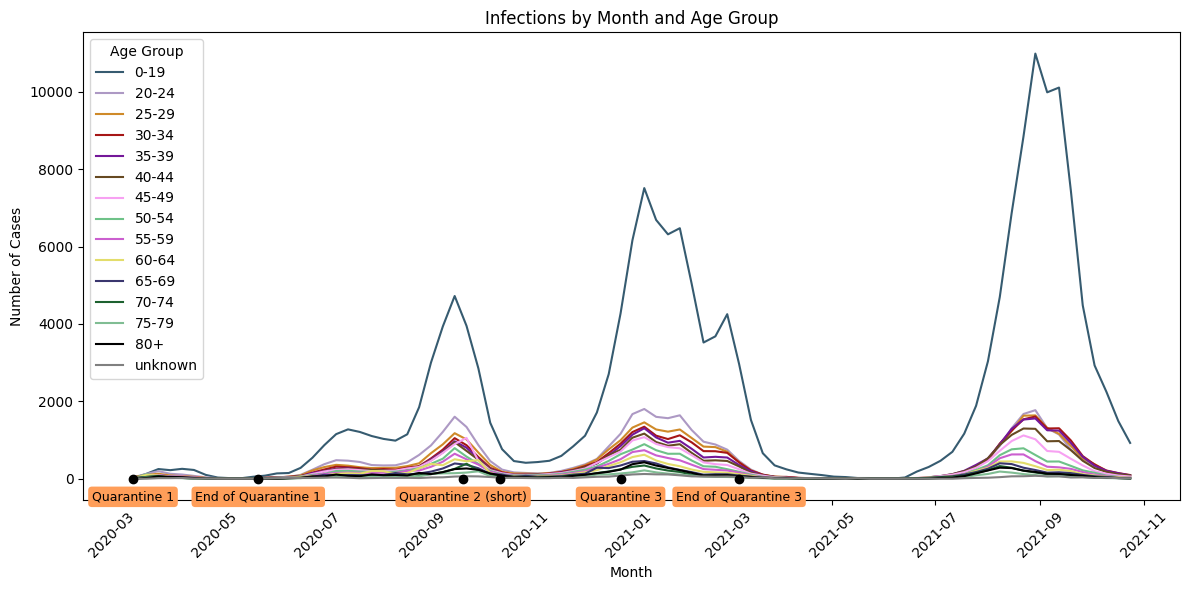

In [28]:
custom_palette = {
    '0-19': '#365b70',  
    '20-24': '#ad99c4',  
    '25-29': '#cf8a29',  
    '30-34': '#a61616',  
    '35-39': '#741799',  
    '40-44': '#664921',  
    '45-49': '#f7a1f2',  
    '50-54': '#6ec288',  
    '55-59': '#cb5fcf',  
    '60-64': '#e3dd6b',  
    '65-69': '#3a366e',  
    '70-74': '#1d612f',  
    '75-79': '#80bd93',  
    '80+': 'black',
    'unknown': 'gray'  # Adding color for 'unknown'
}


plt.figure(figsize=(12, 6)) 
sb.lineplot(data=cases, x='first_week_day', y='weekly_cases', hue='age_group', marker=None, errorbar=None, palette=custom_palette)

# Add labels and title
plt.title('Infections by Month and Age Group')
plt.xlabel('Month')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.legend(title='Age Group')


#בשביל קריאת נתונים יותר ברורה אוסיף גם את הנקודות בזמן שבהן החלו ונגמרו הסגרים

annotations = {
    '2020-03-14': 'Quarantine 1',
    '2020-05-27': 'End of Quarantine 1',
    '2020-09-25': 'Quarantine 2 (short)',
    '2020-10-17': '',
    '2020-12-27': 'Quarantine 3',
    '2021-03-07': 'End of Quarantine 3'
}


for date, label in annotations.items():
    plt.plot(pd.Timestamp(date), 0, 'ko')  # Place a black dot on the x-axis at y=0
    plt.text(pd.Timestamp(date), -300, label, color='black', ha='center', va='top', fontsize=9, bbox=dict(facecolor='#ff9e59', edgecolor='none', boxstyle='round,pad=0.3'))


plt.tight_layout()
plt.show()


ניתן לראות חפיפה ברורה בין קבוצות הגיל - העליות בתחלואה חופפות והגלים השפיעו באופן דומה מאוד על כל קבוצות הגיל

#### כעת נבדוק את התמותה לאורך החודשים הנבחנים

##### מה השבוע שהיו בו הכי הרבה נפטרים

In [18]:
cases[cases['weekly_deceased']==cases.weekly_deceased.max()]

,first_week_day,last_week_day,age_group,gender,weekly_tests_num,weekly_cases,weekly_deceased
1909,2021-01-10,2021-01-16,80+,Men,7443,506,112


C:\Users\nimro\AppData\Local\Temp\ipykernel_28148\1699692586.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(monthly_deceased.index.astype(str), rotation=45)


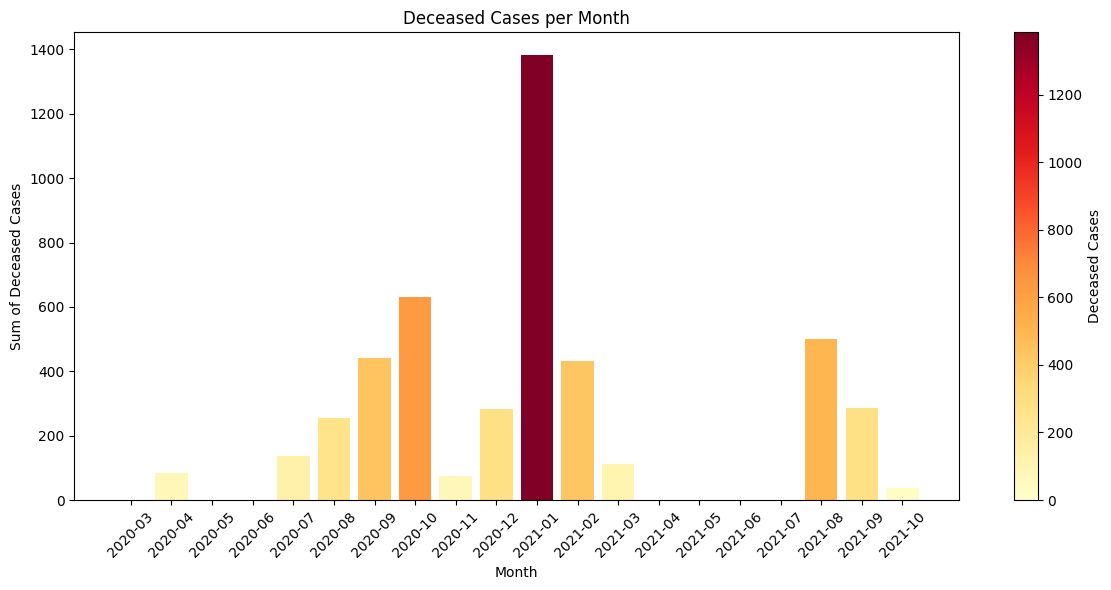

In [19]:
monthly_deceased = cases.groupby(cases['first_week_day'].dt.to_period('M'))['weekly_deceased'].sum()

norm = mcolors.Normalize(vmin=monthly_deceased.min(), vmax=monthly_deceased.max())

cmap = plt.get_cmap('YlOrRd')  # בחירת פלטת צבעים

# Create the bar chart
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(monthly_deceased.index.astype(str), monthly_deceased.values, color=cmap(norm(monthly_deceased.values)))

cbar = fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)
cbar.set_label('Deceased Cases')

ax.set_title('Deceased Cases per Month')
ax.set_xlabel('Month')
ax.set_ylabel('Sum of Deceased Cases')
ax.set_xticklabels(monthly_deceased.index.astype(str), rotation=45)


plt.tight_layout()
plt.show()

##### ניתן לראות בבירור כי בחודש ינואר 2021 התמותה בישראל מהנגיף הגיעה לשיאה עם כמעט 1400 נפטרים לחודש זה
נמצא מה הייתה כמות הנפטרים המדויקת

In [20]:
monthly_deceased = cases.groupby(cases['first_week_day'].dt.to_period('M'))['weekly_deceased'].sum()

month_with_max_deceased = monthly_deceased[monthly_deceased == monthly_deceased.max()]

month_with_max_deceased 

first_week_day
2021-01    1384
Freq: M, Name: weekly_deceased, dtype: int64

##### מצאנו כי במהלך חודש ינואר 2021 נפטרו בישראל 1384 אנשים מנגיף הקורונה
##### נתמקד בנתונים של חודש זה בלבד:

In [21]:
filtered_cases = cases[cases['first_week_day'].dt.to_period('M') == '2021-01']

deceased_by_group_gender = filtered_cases.groupby(['age_group', 'gender'])['weekly_deceased'].sum().reset_index()

print(deceased_by_group_gender)

   age_group      gender  weekly_deceased
0       0-19         Men                0
1       0-19  Not Binary                0
2       0-19       Women                0
3      20-24         Men                0
4      20-24  Not Binary                0
5      20-24       Women                0
6      25-29         Men                0
7      25-29  Not Binary                0
8      25-29       Women                0
9      30-34         Men                0
10     30-34  Not Binary                0
11     30-34       Women                0
12     35-39         Men                0
13     35-39  Not Binary                0
14     35-39       Women                0
15     40-44         Men                0
16     40-44  Not Binary                0
17     40-44       Women                0
18     45-49         Men                0
19     45-49  Not Binary                0
20     45-49       Women                0
21     50-54         Men                0
22     50-54  Not Binary          

##### בשביל תוצאה קריאה יותר, נציג את התוצאות בגרף ונמיין אותן לפי קבוצת גיל ומין לחודש הספציפי הזה

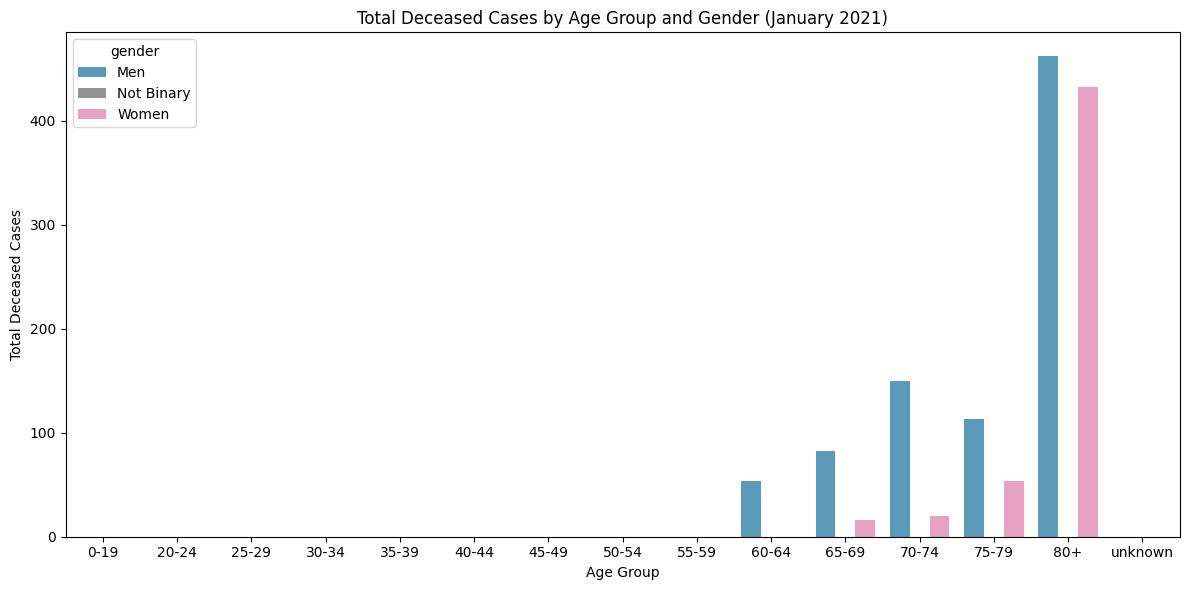

In [22]:
filtered_cases = cases[cases['first_week_day'].dt.to_period('M') == '2021-01']

deceased_by_group_gender = filtered_cases.groupby(['age_group', 'gender'])['weekly_deceased'].sum().reset_index()

plt.figure(figsize=(12, 6))

custom_palette = ['#4ca0c7', '#949494', '#f296c3'] 

sb.barplot(data=deceased_by_group_gender, x='age_group', y='weekly_deceased', hue='gender', palette=custom_palette)

plt.title('Total Deceased Cases by Age Group and Gender (January 2021)')
plt.xlabel('Age Group')
plt.ylabel('Total Deceased Cases')

plt.tight_layout()
plt.show()

כאן ניכרות מאוד מסקנותינו הקודמות. בני הגיל השלישי הם אלה שהכי ניזוקו ומתו בגלל המחלה, וכמו כן-מיתות הגברים עלו על מיתות הנשים

#### כעת נבדוק את שיעור הבדיקות לאורך החודשים בטבלת הנתונים

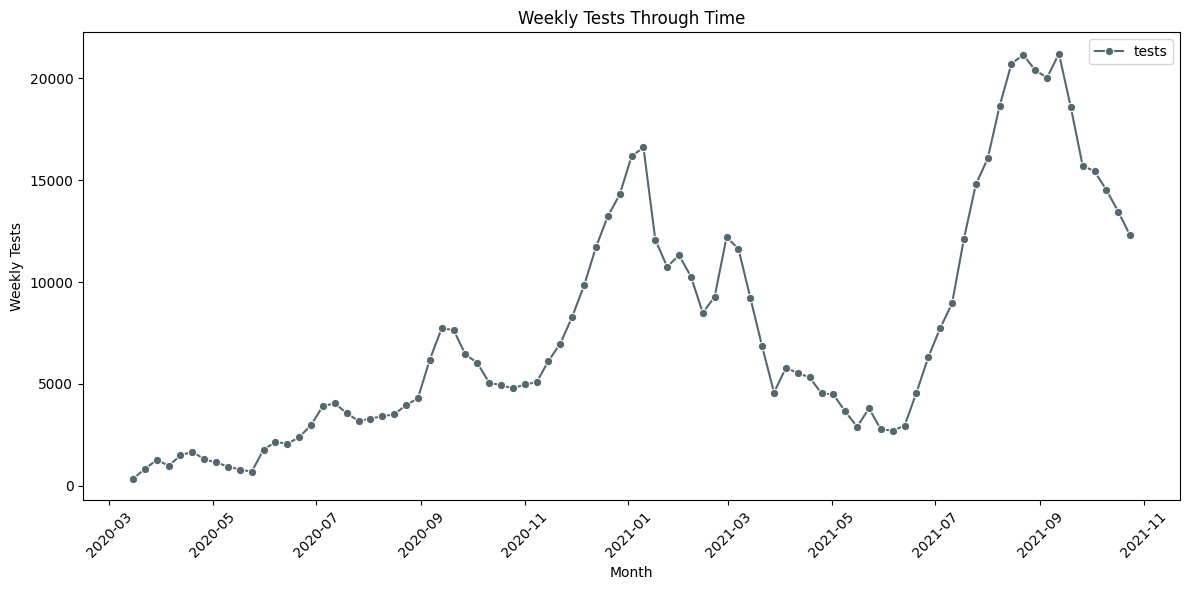

In [23]:
plt.figure(figsize=(12,6))

sb.lineplot(data=cases, x='first_week_day', y='weekly_tests_num', label='tests', marker='o',errorbar=None, color = "#556870")

plt.title('Weekly Tests Through Time')
plt.xlabel('Month')
plt.ylabel('Weekly Tests')
plt.xticks(rotation=45)


plt.tight_layout()
plt.show()

עם הזמן חלה עליה במספר הבדיקות השבועיות שבוצעו. ככל הנראה הבדיקות הפכו לזמינות יותר ואף הפכו לדרישות במקרים מסוימים-ולכן ניתן לראות את העלייה

####  נסתכל על אחוז הבדיקות החיוביות מתוך כל הבדיקות שבוצעו

In [25]:
cases['weekly_cases'].sum()/cases['weekly_tests_num'].sum()*100

np.float64(4.5465676374921635)

בסה"כ מתוך כל בדיקות הקורונה שבוצעו בתאריכים הנתונים, רק 4% מהן היו חיוביות

##### נסתכל גם על אחוז הבדיקות החיוביות מסך כל הבדיקות לאורך זמן

בשביל לעשות זאת ארצה להציג גרף מסוג 100% שיציג את אחוז הבדיקות החיוביות מתוך כמות הבדיקות באותו שבוע. לכל שבוע נקבל תוצאה בין 0 ל-100 אחוזים ואת התוצאה נציג בגרף

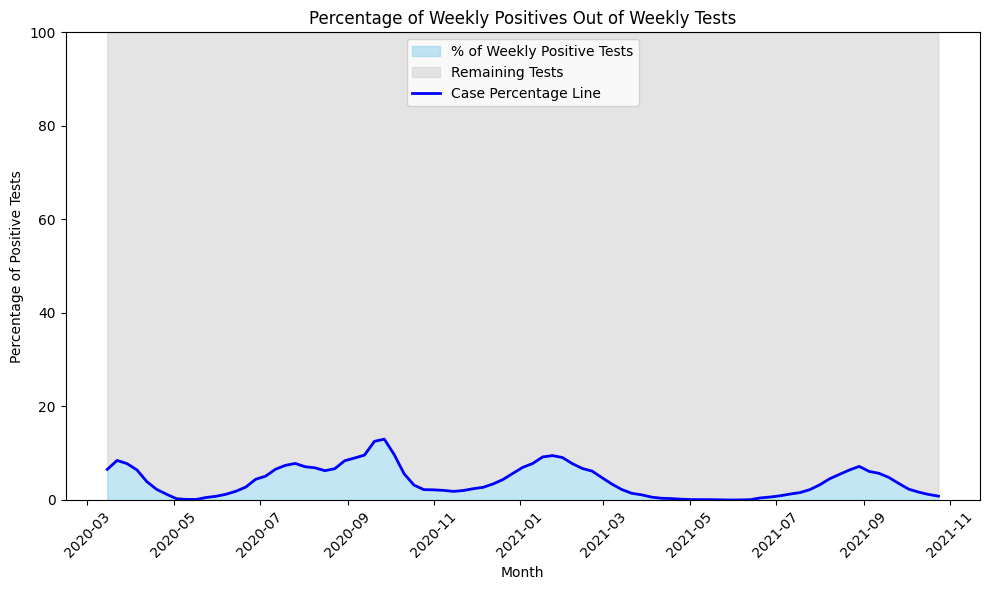

In [26]:
# נוסיף טור שיציג עבור כל שבוע את אחוז הבדיקות החיוביות
cases['case_percentage'] = (cases['weekly_cases'] / cases['weekly_tests_num']) * 100

# לסכם בדיקו
weekly_data = cases.groupby('first_week_day').agg({
                                                   'weekly_tests_num': 'sum',
                                                   'weekly_cases': 'sum'
                                                 }).reset_index()

# חישוב האחוז
weekly_data['case_percentage'] = (weekly_data['weekly_cases'] / weekly_data['weekly_tests_num']) * 100


plt.figure(figsize=(10, 6))

# צביעת השטח שמתחת לגרף
plt.fill_between(weekly_data['first_week_day'], 
                 weekly_data['case_percentage'], 
                 color="skyblue", alpha=0.5, label="% of Weekly Positive Tests")

# צביעת השטח שמעל הגרף
plt.fill_between(weekly_data['first_week_day'], 
                 weekly_data['case_percentage'], 
                 100, 
                 color="lightgray", alpha=0.6, label="Remaining Tests")


# הקו הכחול-הגרף עצמו
plt.plot(weekly_data['first_week_day'], weekly_data['case_percentage'], color="blue", lw=2, label="Case Percentage Line")


plt.title('Percentage of Weekly Positives Out of Weekly Tests')
plt.xlabel('Month')
plt.ylabel('Percentage of Positive Tests')
plt.xticks(rotation=45)
plt.legend()
plt.ylim(0, 100)


plt.tight_layout()
plt.show()

##### בגרף זה ניתן גם לראות בבירור את גלי המגפה, אך עדיין אחוז הבדיקות החיוביות היה נמוך מאוד.

הערה: כשמציגים את טבלת המידע המקורית עם טור האחוז של הבדיקות החיוביות, לא נוכל לראות את האחוז האמיתי של הבדיקות לאורך השבועות בגלל הפילוג לקבוצות גיל שונות. כך למשל בקבוצת גיל מסוימת התוצאה תהיה 50% בעוד שבסיכום הכולל של אותו שבוע התוצאה תהיה 10% בלבד

## שלב ג' - סיכום והסקת מסקנות

מגפת הקורונה הכתה בישראל בתחילת שנת 2020 והשאירה את חותמה שנים קדימה

שיא המגיפה הגיע בחודש ינואר 2021 עם 1384 נפטרים לחודש זה.
 
במחקרי קיוויתי ללמוד לעומק על התפשטות המחלה במדינה ועל השפעותיה על קבוצות גיל ומין שונות.

מהניתוח והגרפים הויזואליים למדנו כי יש הבדל בין השפעת הקורונה על קבוצות אלה- למדנו כי גברים בכל הגילאים נמצאים בסיכון גבוה יותר לפטירה מהנגיף, וכמו כן שבני 60+ הם עיקר האוכלוסייה שעליה להיזהר.

.המלצתי היא שיווק החיסון לכלל האוכלוסייה אך שימת דגש על בני 60 ומעלה

כמו כן הייתי ממליצה להפיץ מודעות לקבוצות הגיל שנמצאות בסיכון על מנת למנוע הפצת חרדה במדינה. על משרד הבריאות לפרסם את תוצאות המחקר ולהדגיש עד כמה האוכלוסייה המבוגרת נמצאת בסיכון, ומנגד- להמשיך ולהזהיר את הדור הצעיר מפני הפצת המחלה אך הרגעתם בכל הנוגע לסכנת חיים ממשית.

בשל הפאניקה הרבה שהמגפה גרמה, המלצתי היא להפיץ כמה שיותר מידע על מנת ליידע אנשים בסטטיסטיקות המדויקות בנושא ולמנוע הפצת תיאוריות ומידע שקרי.

בנושא הבדיקות מצאתי כי רק 4% מכלל הבדיקות שבוצעו התגלו כחיוביות. כלומר, אין התאמה בין כמות הבדיקות לכמות החולים. ניתן לשייך אי התאמה זו להפיכתן של הבדיקות לזמינות יותר, וגם לדרישות משרד הבריאות כי על האוכלוסייה להיבדק בתדירות גבוהה- בדיקות הקורונה הפכו לדרישה בסיסית עם היציאה מהסגר השלישי והחזרה ללימודים ולמשק.

חשוב להדגיש כי בישראל  נפטרים בממוצע 45,000 אנשים בשנה.
על כן, מוות מסיבות בריאותיות אחרות כמו בעיות לב או מחלות כרוניות, נותר הגורם הראשון לפטירה בישראל לעומת נגיף הקורונה שהביא למותם של 4,656 חולים. כלומר מגפת הקורונה, אף על פי שגבתה מחיר והבהילה אוכלוסייה שלמה, לא הייתה גורם מוות עיקרי באף שלב.